In [1]:
#########   DATA PREPROCESSING    ############

In [2]:
from PIL import Image
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import *

In [3]:
#file paths
#training data path
cat_p = 'Dataset/cat' #write complete path if file is not in same directory as that of this code
ncat_p = 'Dataset/notcat'
icat_p = 'Dataset/input_cat_resized'
incat_p = 'Dataset/input_notcat_resized'

#test data path
cat_t_p = 'Dataset/cat_test' 
ncat_t_p = 'Dataset/notcat_test'
icat_t_p = 'Dataset/cat_test_resized'
incat_t_p = 'Dataset/notcat_test_resized'

In [4]:
#make list of elements of file

#traning data
list_cat = os.listdir(cat_p)
list_ncat = os.listdir(ncat_p)

#test data
list_cat_t = os.listdir(cat_t_p)
list_ncat_t = os.listdir(ncat_t_p)

In [5]:
#resize all images from cat folder and store in input_cat_resize folder

#training data
for i in list_cat:
    im = Image.open(cat_p+'\\'+i)
    im1 = im.resize((200,200))
    im2 = im1.convert('RGB')
    im2.save(icat_p+'\\'+i,'JPEG')    
    
#test data
for i in list_cat_t:
    im = Image.open(cat_t_p+'\\'+i)
    im1 = im.resize((200,200))
    im2 = im1.convert('RGB')
    im2.save(icat_t_p+'\\'+i,'JPEG')    


C:\Users\wishw\Anaconda3\lib\site-packages\PIL\Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [6]:
#resize all images from notcat folder and store in input_notcat_resize folder

#training data
for i in list_ncat:
    im = Image.open(ncat_p+'\\'+i)
    im1 = im.resize((200,200))
    im2 = im1.convert('RGB')
    im2.save(incat_p+'\\'+i,'JPEG')    
    
#test data
for i in list_ncat_t:
    im = Image.open(ncat_t_p+'\\'+i)
    im1 = im.resize((200,200))
    im2 = im1.convert('RGB')
    im2.save(incat_t_p+'\\'+i,'JPEG')    


C:\Users\wishw\Anaconda3\lib\site-packages\PIL\Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [7]:
#list out resized images 

#training data
list_cat = os.listdir(icat_p)
list_ncat = os.listdir(incat_p)

#test data
list_cat_t = os.listdir(icat_t_p)
list_ncat_t = os.listdir(incat_t_p)

In [8]:
m_c = len(list_cat)
m_nc = len(list_ncat)
m_c_t = len(list_cat_t)
m_nc_t = len(list_ncat_t)

In [9]:
#flatten images to matrix(m,n_x)

#training data
catmatrix = np.array([np.array(Image.open(icat_p+'\\'+i)).flatten() for i in list_cat],'f')

#test data
cat_tmatrix = np.array([np.array(Image.open(icat_t_p+'\\'+i)).flatten() for i in list_cat_t],'f')

In [10]:
catmatrix.shape

(600, 120000)

In [11]:
cat_tmatrix.shape

(200, 120000)

In [12]:
cat = catmatrix.T
cat_t = cat_tmatrix.T

In [13]:
cat.shape

(120000, 600)

In [14]:
cat_t.shape

(120000, 200)

In [15]:
#flatten images to matrix

#training data
ncatmatrix = np.array([np.array(Image.open(incat_p+'\\'+i)).flatten() for i in list_ncat],'f')

#test data
ncat_tmatrix = np.array([np.array(Image.open(incat_t_p+'\\'+i)).flatten() for i in list_ncat_t],'f')


In [16]:
ncatmatrix.shape

(400, 120000)

In [17]:
ncat_tmatrix.shape

(200, 120000)

In [18]:
ncat = ncatmatrix.T
ncat_t = ncat_tmatrix.T

In [19]:
ncat.shape

(120000, 400)

In [20]:
ncat_t.shape

(120000, 200)

In [21]:
#concatanate both matrix to form our dataset
X = np.concatenate((cat,ncat),axis=1)
X_t = np.concatenate((cat_t,ncat_t),axis=1)

In [22]:
X.shape

(120000, 1000)

In [23]:
X_t.shape

(120000, 400)

In [24]:
#labelling the dataset
m = X.shape[1] #no. of images
m_t = X_t.shape[1]
Y = np.zeros((m,1),dtype=int)
Y_t = np.zeros((m_t,1),dtype=int)
Y[0:m_c] = 1 
Y_t[0:m_c_t] = 1

In [25]:
Y = Y.reshape((1,X.shape[1])).T
Y_t = Y_t.reshape((1,X_t.shape[1])).T

In [26]:
Y.shape

(1000, 1)

In [27]:
Y_t.shape

(400, 1)

In [28]:
X = X.reshape((120000,X.shape[1])).T
X_t = X_t.reshape((120000,X_t.shape[1])).T

In [29]:
X.shape

(1000, 120000)

In [30]:
X_t.shape

(400, 120000)

In [31]:
#shuffle data
X_train,Y_train = shuffle(X,Y, random_state=0)
X_test,Y_test = shuffle(X_t,Y_t, random_state=0)

In [32]:
X_train = X_train.T
X_test = X_test.T

In [33]:
X_train.shape

(120000, 1000)

In [34]:
X_test.shape

(120000, 400)

In [35]:
Y_train = Y_train.T
Y_test = Y_test.T

In [36]:
Y_train.shape

(1, 1000)

In [37]:
Y_test.shape

(1, 400)

In [38]:
#standardize data
X_train = X_train/255   #255 is maximum possible value in image pixle 
X_test = X_test/255

In [39]:
#
#-----------   FUNCTIONS USED IN LEARNING MODEL      ----------------
#

In [40]:
#sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [41]:
#initialization of parameter w,b
def initialize(n_x):
    W = np.random.randn(1,n_x)*0.01
    #W = np.zeros(shape=(1,n_x))
    b = 0
    assert(W.shape == (1,n_x))
    assert(isinstance(b, float) or isinstance(b, int))

    return W,b

In [42]:
#forword and backword propagation
def propagate(X,Y,W,b):
    m = X.shape[1]
    
    #forword propagation
    Z = np.dot(W,X) + b
    A = sigmoid(Z)
    J = (-1/m)* np.sum(Y * np.log1p(A) + (1-Y) * (np.log1p(1-A)))
    
    #backword propagation
    dZ = A - Y
    dW = (1/m)*np.dot(dZ,X.T)
    db = (1/m)*np.sum(dZ)
    
    assert(dW.shape == W.shape)
    assert(db.dtype == float)
    J = np.squeeze(J)
    assert(J.shape == ())
    
    grad = {"dW":dW,
            "db":db}
    
    return grad,J

In [43]:
def optimize(W, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        
        grad,J = propagate(X,Y,W,b)
    
        dW = grad["dW"]
        db = grad["db"]
        
        W = W - learning_rate*dW
        b = b - learning_rate*db
        
        if i%100==0:
            costs.append(J)
            print ("Cost after iteration %i: %f" % (i, J))
        
    params = {"W": W,
              "b": b}
    grad = {"dW": dW,
             "db": db}
    
    return params, grad, costs

In [44]:
#predict function
def predict(W,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    W = W.reshape(1,X.shape[0])
    Z = np.dot(W, X) + b
    A = sigmoid(Z)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
       
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [45]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
    
    # initialize parameters with zeros
    W, b = initialize(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(W, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    W = parameters["W"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(W, b, X_test)
    Y_prediction_train = predict(W, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [46]:
#
# -------------   LEARNING THE MODEL   ----------------
#

In [47]:

d = model(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = 0.0002)

Cost after iteration 0: -0.423262
Cost after iteration 100: -0.439693
Cost after iteration 200: -0.449866
Cost after iteration 300: -0.457257
Cost after iteration 400: -0.463387
Cost after iteration 500: -0.468682
Cost after iteration 600: -0.473361
Cost after iteration 700: -0.477565
Cost after iteration 800: -0.481390
Cost after iteration 900: -0.484907
Cost after iteration 1000: -0.488167
Cost after iteration 1100: -0.491211
Cost after iteration 1200: -0.494070
Cost after iteration 1300: -0.496770
Cost after iteration 1400: -0.499329
Cost after iteration 1500: -0.501764
Cost after iteration 1600: -0.504089
Cost after iteration 1700: -0.506315
Cost after iteration 1800: -0.508452
Cost after iteration 1900: -0.510507
Cost after iteration 2000: -0.512488
Cost after iteration 2100: -0.514400
Cost after iteration 2200: -0.516249
Cost after iteration 2300: -0.518040
Cost after iteration 2400: -0.519776
Cost after iteration 2500: -0.521462
Cost after iteration 2600: -0.523100
Cost after it

In [48]:
#
# ------ PLOTING THE COST vs NO. OF ITERATIONS ------------
#

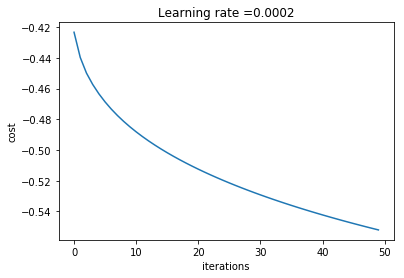

In [49]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()
